The standard deviation of datasize 10 in bubbleSort implementation is 8.94427190999916e-06
The standard deviation of datasize 13 in bubbleSort implementation is 8.94427190999916e-06
The standard deviation of datasize 17 in bubbleSort implementation is 1.341640786499874e-05
The standard deviation of datasize 26 in bubbleSort implementation is 3.577708763999663e-05
The standard deviation of datasize 52 in bubbleSort implementation is 4.266145801540309e-05
The standard deviation of datasize 10 in quickSort implementation is 1.30384048104053e-05
The standard deviation of datasize 13 in quickSort implementation is 4.472135954999579e-06
The standard deviation of datasize 17 in quickSort implementation is 4.472135954999576e-06
The standard deviation of datasize 26 in quickSort implementation is 4.472135954999579e-06
The standard deviation of datasize 52 in quickSort implementation is 2.7748873851023215e-05
The standard deviation of datasize 10 in insertionSort implementation is 4.472135954999

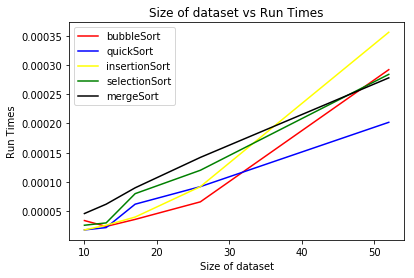

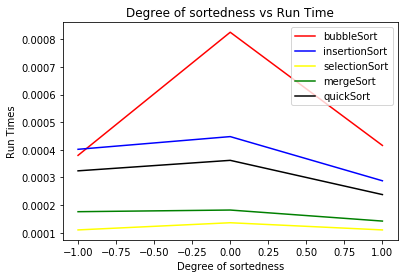

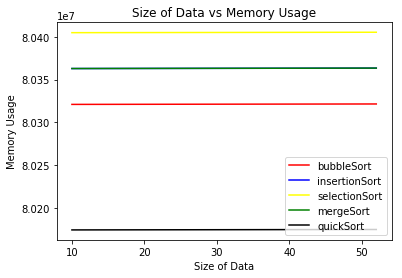

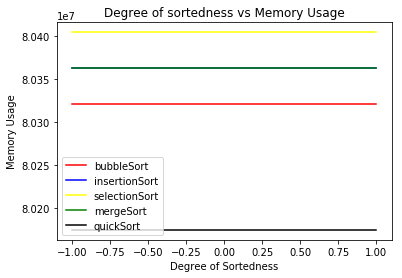

In [60]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
import sys
%matplotlib inline

df_UScensus = pd.read_csv("C://Users//Harish//data for sorting//US_population_Apr2010.csv")
dataset = df_UScensus['Census'].values.tolist()

# df_institute = pd.read_csv("C://Users//Harish//data for sorting//InstitudeID_OPEID.csv")
# dataset = list(df_institute.values.flatten())
# for ele in dataset:
#     if ele>99999:
#         dataset.remove(ele)

# df_numbers = pd.read_csv("C://Users//Harish//data for sorting//SyntheticData1.csv")
# dataset = list(df_numbers.values.flatten())

# df_decimals = pd.read_csv("C://Users//Harish//data for sorting//SD2.csv")
# dataset = list(df_decimals.values.flatten())

#datasets_list=[dataset1,dataset2,dataset3,dataset4]
#for dataset in datasets_list:
algo_list=['bubbleSort','quickSort','insertionSort','selectionSort','mergeSort']
datasize=[(len(dataset)//i) for i in range(5,0,-1)]
fig, ax = plt.subplots()
fig1,ax1=plt.subplots()
fig2,ax2=plt.subplots()
fig3,ax3=plt.subplots()

#In this function, we are calculating the runtime of different sorting algorithms for each datasize. 
#Each simulation runs for 5 times and we are taking the average of five simulations to plot the graph.
#we are also printing out the standard deviation. 
def calculateRunTime(algo,dataset,size):
    run_time=[]
    average_runtime=[]
    final_runtime=[]
    if algo == 'bubbleSort':
        for j in size:
            for i in range(0,5):
                start_time=time.clock()
                bubbleSort(dataset[:j])
                run_time.append(round(time.clock()-start_time,5))
            print('The standard deviation of datasize {} in bubbleSort implementation is {}'.format(j,stdev(run_time)))
            average_runtime.append((sum(run_time)/len(run_time)))
            run_time.clear()
        return average_runtime
    elif algo == 'mergeSort':
        for j in size:
            for i in range(0,5):
                start_time=time.clock()
                mergeSort(dataset[:j])
                run_time.append(round(time.clock()-start_time,5))
            print('The standard deviation of datasize {} in mergeSort implementation is {}'.format(j,stdev(run_time)))
            average_runtime.append((sum(run_time)/len(run_time)))
            run_time.clear()
        return average_runtime
    elif algo == 'selectionSort':
        for j in size:
            for i in range(0,5):
                start_time=time.clock()
                selectionSort(dataset[:j])
                run_time.append(round(time.clock()-start_time,5))
            print('The standard deviation of datasize {} in selectionSort implementation is {}'.format(j,stdev(run_time)))
            average_runtime.append((sum(run_time)/len(run_time)))
            run_time.clear()
        return average_runtime
    elif algo == 'insertionSort':
        for j in size:
            for i in range(0,5):
                start_time=time.clock()
                insertionSort(dataset[:j])
                run_time.append(round(time.clock()-start_time,5))
            print('The standard deviation of datasize {} in insertionSort implementation is {}'.format(j,stdev(run_time)))
            average_runtime.append((sum(run_time)/len(run_time)))
            run_time.clear()
        return average_runtime
    elif algo == 'quickSort':
        for j in size:
            for i in range(0,5):
                start_time=time.clock()
                quickSort(dataset[:j],0,len(dataset[:j])-1)
                run_time.append(round(time.clock()-start_time,5))
            print('The standard deviation of datasize {} in quickSort implementation is {}'.format(j,stdev(run_time)))
            average_runtime.append((sum(run_time)/len(run_time)))
            run_time.clear()
        return average_runtime

def inversion(dataset):
    reversed_dataset=insertionSort(dataset)
    reversed_dataset.reverse()
    return reversed_dataset

algo_runtimes={name:calculateRunTime(name,dataset,datasize) for name in algo_list}
colors=['red','blue','yellow','green','black']

for (label, runtimes), color in zip(algo_runtimes.items(), colors):
    ax.plot(datasize, runtimes, color=color, label=label)
ax.legend()
ax.set_xlabel('Size of dataset')
ax.set_ylabel('Run Times')
ax.set_title('Size of dataset vs Run Times')
plt.savefig('Dataset vs Runtimes.png',dpi=300)

sorted_data=selectionSort(dataset)
reversed_data=sorted_data.reverse()
initial_data=dataset
lists_sortedness=[reversed_data,initial_data,sorted_data]
degree_of_sortedness=[-1,0,1]
algo_runtimes_sortedness={'bubbleSort':[],'insertionSort':[],'selectionSort':[],'mergeSort':[],'quickSort':[]}
values_list=[]
for name in algo_list:
    for data in lists_sortedness:
        algo_runtimes_sortedness[name].append(calculateRunTime(name,dataset,[len(dataset)]))

sorted_runtimes=[]
for values in algo_runtimes_sortedness.values():
    for value in values:
        sorted_runtimes.append(value[0])
i=0
new_list=[]
while i<len(sorted_runtimes):
    new_list.append(sorted_runtimes[i:i+3])
    i+=3

for (key,i) in zip(algo_runtimes_sortedness.keys(),range(len(new_list))):
    algo_runtimes_sortedness[key]=new_list[i]

for (label,runtimes),color in zip(algo_runtimes_sortedness.items(),colors):
    ax1.plot(degree_of_sortedness, runtimes, color=color, label=label)
ax1.legend()
ax1.set_xlabel('Degree of sortedness')
ax1.set_ylabel('Run Times')
ax1.set_title('Degree of sortedness vs Run Time')
plt.savefig('Degree of sortedness vs Runtimes.png',dpi=300)


memory_usage={'bubbleSort':[],'insertionSort':[],'selectionSort':[],'mergeSort':[],'quickSort':[]}
memory_usage['bubbleSort']=[(((len(dataset)//i))*12)+(76.60*1048576) for i in range(5,0,-1)]
memory_usage['insertionSort']=[(((len(dataset)//i))*12)+(76.64*1048576) for i in range(5,0,-1)]
memory_usage['selectionSort']=[(((len(dataset)//i))*12)+(76.68*1048576) for i in range(5,0,-1)]
memory_usage['mergeSort']=[(((len(dataset)//i))*12)+(76.64*1048576) for i in range(5,0,-1)]
memory_usage['quickSort']=[(((len(dataset)//i))*12)+(76.46*1048576) for i in range(5,0,-1)]
for (label,memory),color in zip(memory_usage.items(),colors):
    ax2.plot(datasize,memory,color=color,label=label)
ax2.legend()
ax2.set_xlabel('Size of Data')
ax2.set_ylabel('Memory Usage')
ax2.set_title('Size of Data vs Memory Usage')
plt.savefig('Datasize vs MemoryUsage.png',dpi=300)

memory_sortedness={'bubbleSort':[],'insertionSort':[],'selectionSort':[],'mergeSort':[],'quickSort':[]}
memory_sortedness['bubbleSort']=[(len(dataset)+(76.60*1048576))]*3
memory_sortedness['insertionSort']=[(len(dataset)+(76.64*1048576))]*3
memory_sortedness['selectionSort']=[(len(dataset)+(76.68*1048576))]*3
memory_sortedness['mergeSort']=[(len(dataset)+(76.64*1048576))]*3
memory_sortedness['quickSort']=[(len(dataset)+(76.46*1048576))]*3

for (label,memory),color in zip(memory_sortedness.items(),colors):
    ax3.plot(degree_of_sortedness,memory,color=color,label=label)

ax3.legend()
ax3.set_xlabel('Degree of Sortedness')
ax3.set_ylabel('Memory Usage')
ax3.set_title('Degree of sortedness vs Memory Usage')
plt.savefig('Datasize vs MemoryUsage.png',dpi=300)







In [46]:
#in this Quicksort algorithm, we are choosing the last element as pivot

#this function is used to partition the array A into 2 subparts: the subpart containing lower values(below pivot)
#and the subpart containing higher values(above pivot)
%reload_ext memory_profiler
%memit -r 5
memory_usage1=[]
def partition(A,start_index,end_index): 
    index_pivot = (start_index -1)         #the index_pivot stores the value of index of pivot after sorting(the true index)
                                           #initial it is set to -1, because its value can range from index 0 to the end of the array
    pivot = A[end_index]     # pivot: stores the current pivot value(value of element in the last index)
  
    for j in range(start_index , end_index): 
        if   A[j] <= pivot:         #checks if each element is smaller than the pivot
            index_pivot = index_pivot+1     #the true index of pivot is incremented by 1 whenever an element smaller than the pivot is found
            #the elements that are smaller than the pivot are stored in the beginning of the array one after the other in the indexes 0,1,2,3..
            A[index_pivot],A[j] = A[j],A[index_pivot] 
  
    A[index_pivot+1],A[end_index] = A[end_index],A[index_pivot+1] #the pivot is placed in its correct position
                                                            #the existent value in its position is moved to the last index
    return (index_pivot+1) #the true index of the pivot is returned

#Computing Quick sort 
#this function calls itself recursively until the array can no longer be subdivided

def quickSort(A,start_index,end_index): 
    if start_index < end_index: 
        pi = partition(A,start_index,end_index) #the index of pivot in each array/subgroup array is returned by 'partition' function
        #new partitions
        quickSort(A, start_index, pi-1) #the upper subgroup of the array
        quickSort(A, pi+1, end_index)    #the lower subgroup of the array
    
    memory_usage1.append(sys.getsizeof(int())*len(A))
    
    return A  
    

peak memory: 75.80 MiB, increment: 0.06 MiB


In [51]:
#Selection sort
#Find the minimum element in the array and place it in the beginning
#repeat on the unsorted part of the array till all the elements are sorted
%reload_ext memory_profiler
%memit -r 5
memory_usage2=[]
def selectionSort(array1):
    for i in range(len(array1)): 
        min_index = i    #first index of the unsorted array in each iteration
        for j in range(i+1 ,len(array1)): 
            if array1[min_index] > array1[j]:
                min_index = j                   #the index of smallest number in the unsorted array is stored in min_index

        first_pos_val = array1[i]           #value in the first postion of unsorted array
        min_pos_val = array1[min_index]     #minimum value in the unsorted array

        array1[i] = min_pos_val #swap the smaller element with the first element of the unsorted array
        array1[min_index] = first_pos_val
    memory_usage2.append(sys.getsizeof(int())*len(array1))
    
    return array1
        

peak memory: 72.38 MiB, increment: 0.00 MiB


In [47]:
%reload_ext memory_profiler
%memit -r 5
memory_usage3=[]
def bubbleSort(array2):
    for i in range(len(array2)):
        islast_iteration = True
        for j in range(0,len(array2)-1-i):

            if array2[j] > array2[j+1]:
                islast_iteration = False

                temp = array2[j]
                array2[j] = array2[j+1]
                array2[j+1] = temp

        if islast_iteration:
            break
    memory_usage3.append(sys.getsizeof(int())*len(array2))
    
    return array2
                   

peak memory: 75.86 MiB, increment: 0.00 MiB


In [50]:
%reload_ext memory_profiler
%memit -r 5
memory_usage4=[]
def insertionSort(arr):
    size=len(arr)
    for i in range(1,size):                    #for every element in the list,we store its value in 'value' and track the index 
        value=arr[i]                           #with 'hole'. We compare the value with its previous elements in the list as long as
        hole=i                                 #there are elements in the list i.e. 'hole' is not zero,we compare the element in 'value'
        while(hole>0 and arr[hole-1]>value):   #and arrange them in sorted order. At everytime, one part of the array/list is sorted
            arr[hole]=arr[hole-1]              #and other part is unsorted until the 'for' loop is completed. 
            hole=hole-1
        arr[hole]=value
    memory_usage4.append(sys.getsizeof(int())*len(arr))
    
    return arr


peak memory: 72.37 MiB, increment: 0.00 MiB


In [49]:
%reload_ext memory_profiler
%memit -r 5
memory_usage5=[]
def mergeSort(alist):
    if len(alist)>1:               #If there are more than one elements in the list
        mid = len(alist)//2        #we divide the list in two halves
        lefthalf = alist[:mid]     #and store the values in two seperate lists 'lefthalf' and 'righthalf'
        righthalf = alist[mid:]

        mergeSort(lefthalf)       #we sort all the elements in lefthalf by calling the function recursively until there is only one element in the list 
        mergeSort(righthalf)      #we sort all the elements in righthalf by calling the function recursively until there is only one element in the list 

        i=0                       #we initialize these three variables to track the indexes of the elements in lefthalf,righthalf and alist.
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf): #this is the merge condition. We verify the values of each element in the two lists
            if lefthalf[i] < righthalf[j]:              #when the two lists are not exhausted and stores the smaller one to 'alist'. Then
                alist[k]=lefthalf[i]                    #the corresponding indexes are incremented.
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):                       #When all the elements in the 'righthalf' are exhausted but 'lefthalf' has still elements
            alist[k]=lefthalf[i]                       #we store the values in 'lefthalf' to 'alist' in the same order because 'lefthalf' is already sorted
            i=i+1
            k=k+1

        while j < len(righthalf):                     #When all the elements in the 'lefthalf' are exhausted but 'righthalf' has still elements
            alist[k]=righthalf[j]                     #we store the values in 'righthalf' to 'alist' in the same order because 'righthalf' is already sorted
            j=j+1
            k=k+1
    else:                                           #if the number of elements in the list is 1 or 0
        return alist
    memory_usage5.append(sys.getsizeof(int())*len(alist))
    
    return alist


peak memory: 72.37 MiB, increment: 0.00 MiB
